In [ ]:
import pandas as pd
import numpy as np
df =pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.shape

(891, 12)

In [ ]:
# out of a total of 891 entries, 687 entries for cabin are empty.
# this signifies that this column is redundant.
df=df.drop(['Cabin'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
# Replaced using median
median = df['Age'].median()
df['Age'].fillna(median, inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df.shape

(891, 11)

In [ ]:
# Dropping 'Embarked' column
df=df.drop(['Embarked'],axis=1)

In [ ]:
df.shape

(891, 10)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

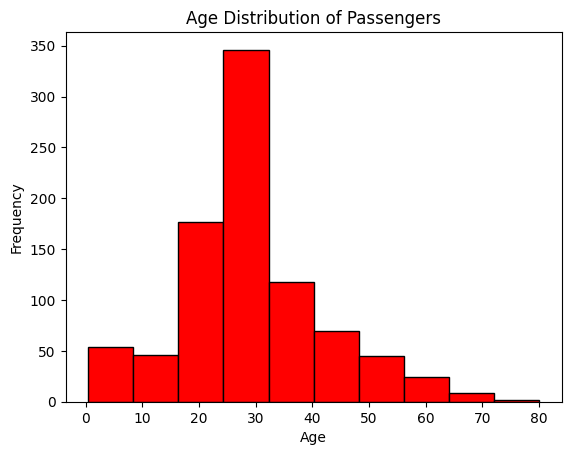

In [ ]:
import matplotlib.pyplot as plt

# Creating histogram
plt.hist(df['Age'], bins=10, color='red', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Passengers')

plt.show()

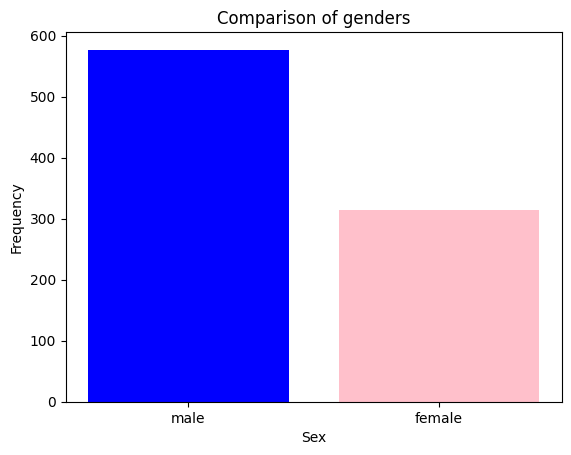

In [ ]:
# Assuming df is your DataFrame and 'Sex' is the column containing sex information
sex_counts = df['Sex'].value_counts()

# Plot histogram
plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'pink'])

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Comparison of genders')

plt.show()

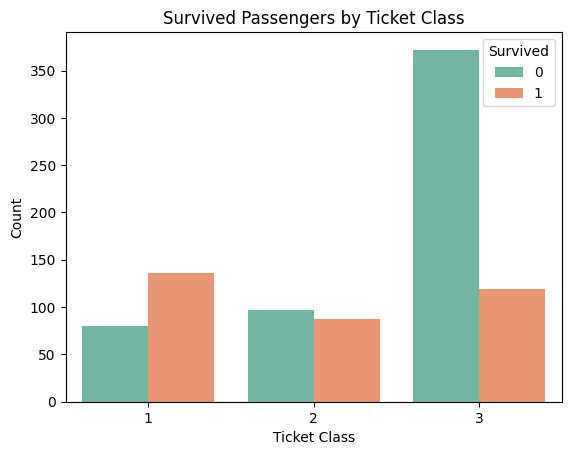

In [ ]:
import seaborn as sns

# Create a count plot
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')

# Add labels and title
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.title('Survived Passengers by Ticket Class')

plt.show()

In [ ]:
# converting string data to numerical data
df['Sex']= df['Sex'].replace({'male':1,'female':0})

<ipython-input-18-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

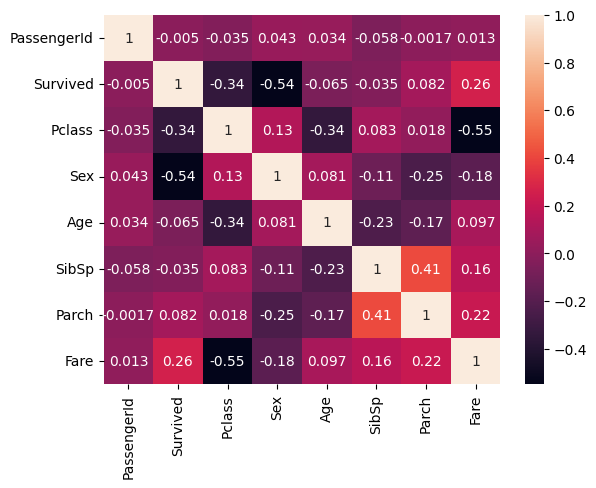

In [ ]:
sns.heatmap(df.corr(),annot=True)

<ipython-input-19-2bdb59859f4f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


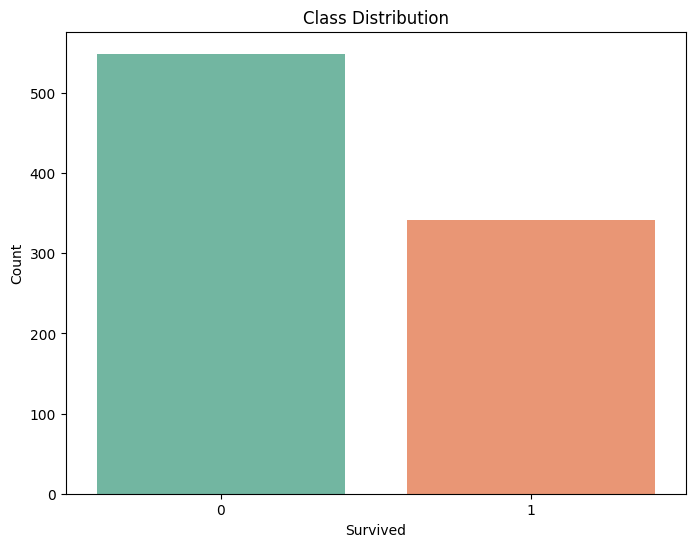

Class Counts:
0    549
1    342
Name: Survived, dtype: int64


In [ ]:
# Count the number of occurrences of each class
class_counts = df['Survived'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Print the class counts
print("Class Counts:")
print(class_counts)


In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(df['Fare'])  # Selecting multiple columns as a list
y = np.array(df['Survived'])

# Reshaping the arrays
X = X.reshape(-1, 1)  # Reshape to have 2 columns
y = y.reshape(-1, 1)  # Reshape to have 1 column (although reshape is not strictly necessary for y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming X_train, X_test, y_train, y_test are your training and testing sets
# Initialize Random Forest classifier with class weighting
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))


<ipython-input-46-d184f9b785f7>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       105
           1       0.58      0.65      0.61        74

    accuracy                           0.66       179
   macro avg       0.65      0.66      0.65       179
weighted avg       0.67      0.66      0.66       179



In [ ]:
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print('confusion matrix: \n', cm)

confusion matrix: 
 [[100   5]
 [ 57  17]]


In [ ]:
true_positives = cm[1, 1]  # Number of true positive predictions
false_positives = cm[0, 1]  # Number of false positive predictions

# Calculate precision
precision = true_positives / (true_positives + false_positives)
print("Precision:", precision)

Precision: 0.7727272727272727


In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy:', accuracy_score(y_test,y_pred))

Accuracy: 0.6536312849162011
